In [1]:
import pandas as pd

# Load the dataset
file_path = "Data Fusion Assignment 2025 Data.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Columns: 998 entries, class to sample_raw_330 + 740
dtypes: float64(993), int64(2), object(3)
memory usage: 2.8+ MB


(None,
    class  id  color transparency         device_id  spectrum_0 + 740  \
 0      1   1  white            o  B0236F1F2D02C632          0.782157   
 1      1   2  white            o  B0236F1F2D02C632          0.948156   
 2      1   4   none            s  B0236F1F2D02C632          0.285657   
 3      1   5   none            s  B0236F1F2D02C632          0.296280   
 4      1   6   none            t  B0236F1F2D02C632          0.171568   
 
    spectrum_1 + 740  spectrum_2 + 740  spectrum_3 + 740  spectrum_4 + 740  \
 0          0.754932          0.730555          0.709195          0.690707   
 1          0.947904          0.947607          0.947237          0.946815   
 2          0.285247          0.284841          0.284432          0.284022   
 3          0.295966          0.295631          0.295269          0.294887   
 4          0.171535          0.171500          0.171459          0.171414   
 
    ...  sample_raw_321 + 740  sample_raw_322 + 740  sample_raw_323 + 740  \
 0  ..

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filter out columns with no missing values

# Summary statistics for numerical columns
summary_stats = df.describe()
print(missing_values)
print(summary_stats)


Series([], dtype: int64)
            class          id  spectrum_0 + 740  spectrum_1 + 740  \
count  373.000000  373.000000        373.000000        373.000000   
mean     3.769437   36.782842          0.654208          0.653436   
std      1.978494   24.717621          0.422635          0.422983   
min      1.000000    1.000000          0.006201          0.006170   
25%      2.000000   17.000000          0.260409          0.259213   
50%      4.000000   32.000000          0.673778          0.673006   
75%      5.000000   56.000000          1.034601          1.034391   
max      8.000000  102.000000          2.231393          2.231846   

       spectrum_2 + 740  spectrum_3 + 740  spectrum_4 + 740  spectrum_5 + 740  \
count        373.000000        373.000000        373.000000        373.000000   
mean           0.652946          0.652708          0.652671          0.652799   
std            0.423211          0.423298          0.423256          0.423095   
min            0.006149      

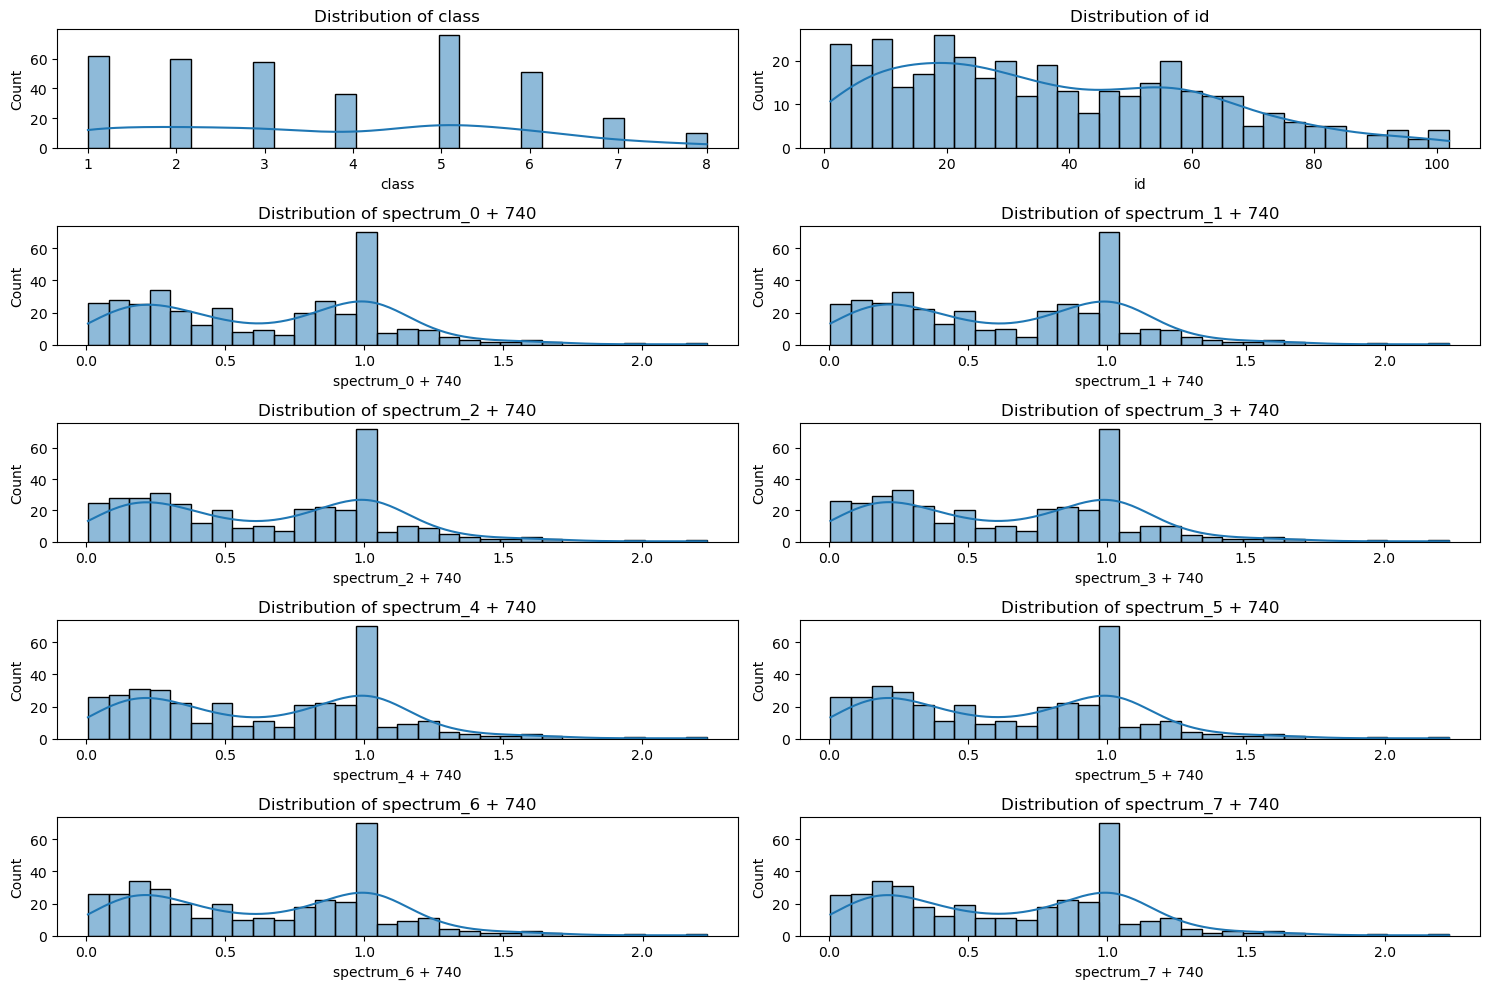

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for distribution analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns[:10]  # Limit to first 10 for visualization

# Plot distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


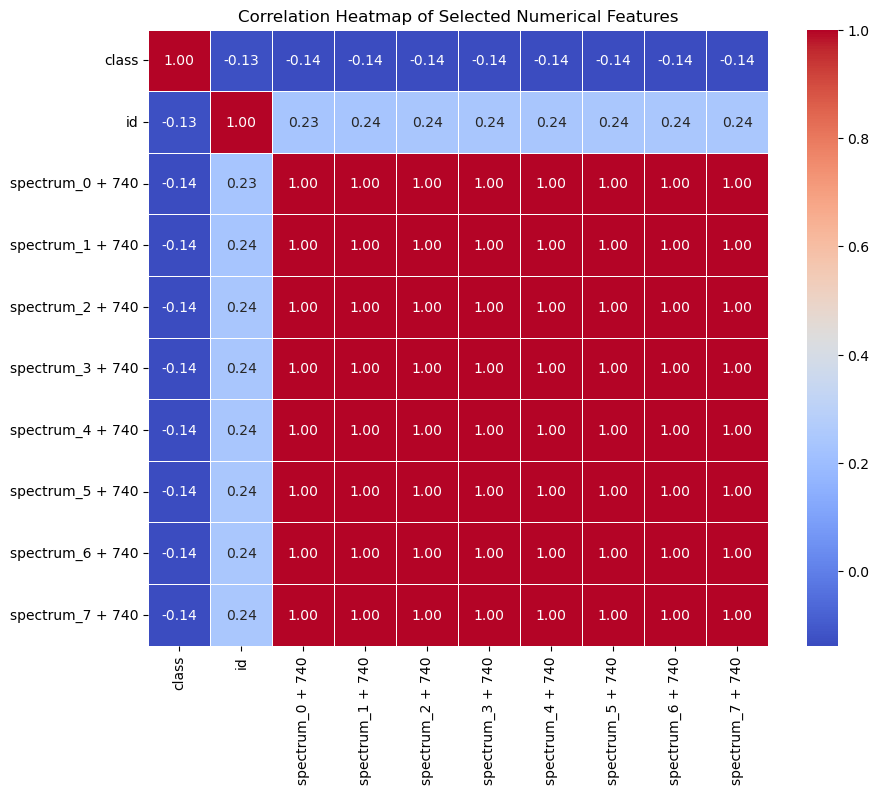

In [4]:
# Compute correlation matrix for a subset of numerical columns (due to high dimensionality)
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Numerical Features")
plt.show()


In [5]:
print(df.head())

   class  id  color transparency         device_id  spectrum_0 + 740  \
0      1   1  white            o  B0236F1F2D02C632          0.782157   
1      1   2  white            o  B0236F1F2D02C632          0.948156   
2      1   4   none            s  B0236F1F2D02C632          0.285657   
3      1   5   none            s  B0236F1F2D02C632          0.296280   
4      1   6   none            t  B0236F1F2D02C632          0.171568   

   spectrum_1 + 740  spectrum_2 + 740  spectrum_3 + 740  spectrum_4 + 740  \
0          0.754932          0.730555          0.709195          0.690707   
1          0.947904          0.947607          0.947237          0.946815   
2          0.285247          0.284841          0.284432          0.284022   
3          0.295966          0.295631          0.295269          0.294887   
4          0.171535          0.171500          0.171459          0.171414   

   ...  sample_raw_321 + 740  sample_raw_322 + 740  sample_raw_323 + 740  \
0  ...                  5.54

/var/folders/d1/rr9r143d5g7135gmmc4plxv00000gn/T/ipykernel_39585/2972930211.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_counts.index, y=color_counts.values, palette="viridis")


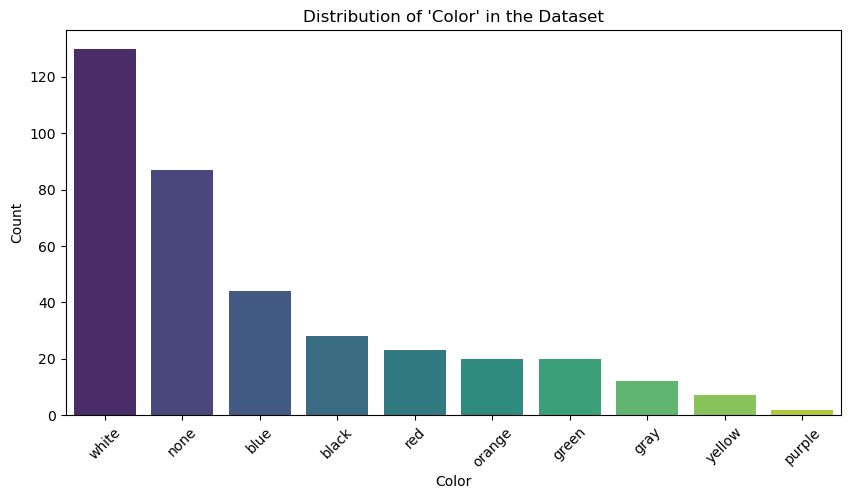

In [6]:
# Count unique values for 'color' column
color_counts = df['color'].value_counts()

# Plot bar chart of color distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=color_counts.index, y=color_counts.values, palette="viridis")
plt.xlabel("Color")
plt.ylabel("Count")
plt.title("Distribution of 'Color' in the Dataset")
plt.xticks(rotation=45)
plt.show()


/var/folders/d1/rr9r143d5g7135gmmc4plxv00000gn/T/ipykernel_39585/1998052202.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transparency_counts.index, y=transparency_counts.values, palette="coolwarm")


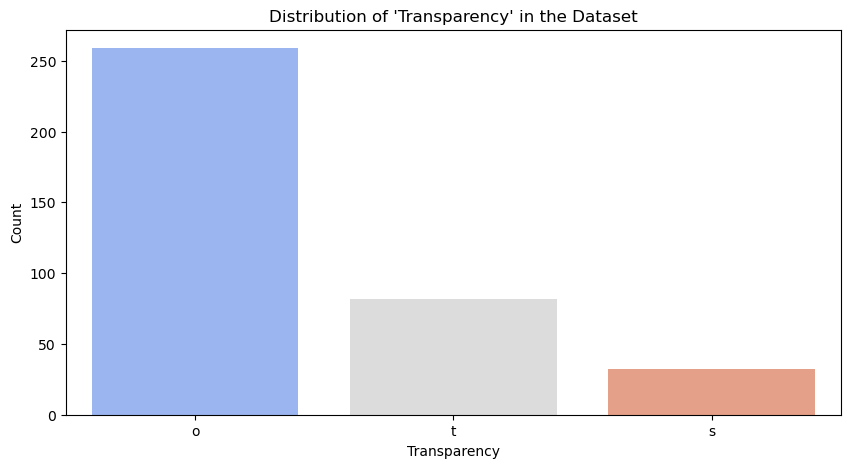

In [7]:
# Count unique values for 'transparency' column
transparency_counts = df['transparency'].value_counts()

# Plot bar chart of transparency distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=transparency_counts.index, y=transparency_counts.values, palette="coolwarm")
plt.xlabel("Transparency")
plt.ylabel("Count")
plt.title("Distribution of 'Transparency' in the Dataset")
plt.show()

/var/folders/d1/rr9r143d5g7135gmmc4plxv00000gn/T/ipykernel_39585/4094565090.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_counts.index, y=device_counts.values, palette="magma")


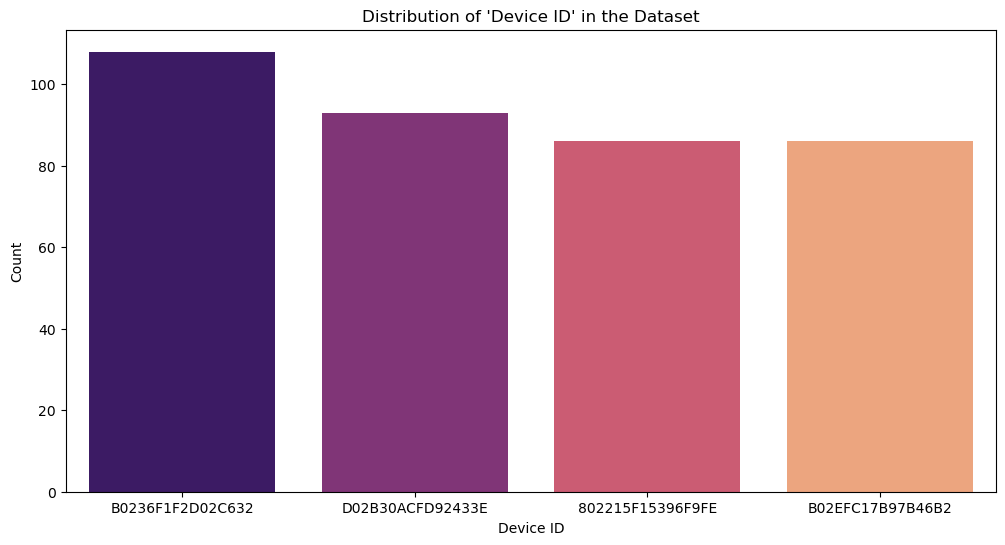

In [8]:
# Count unique values for 'device_id' column
device_counts = df['device_id'].value_counts()

# Plot bar chart of device distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=device_counts.index, y=device_counts.values, palette="magma")
plt.xlabel("Device ID")
plt.ylabel("Count")
plt.title("Distribution of 'Device ID' in the Dataset")
plt.show()


/var/folders/d1/rr9r143d5g7135gmmc4plxv00000gn/T/ipykernel_39585/1706411854.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="magma")


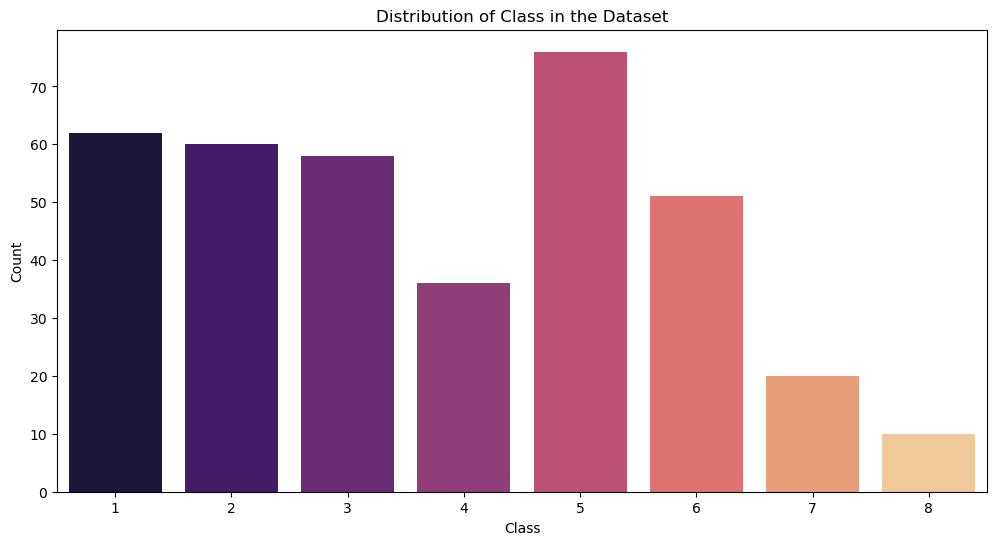

In [9]:
# Count unique values for 'device_id' column
class_counts = df['class'].value_counts()

# Plot bar chart of device distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="magma")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Class in the Dataset")
plt.show()


In [10]:
# Count the number of columns for each category
spectrum_cols = [col for col in df.columns if col.startswith("spectrum_") and "+ 740" in col]
wr_raw_cols = [col for col in df.columns if col.startswith("wr_raw_") and "+ 740" in col]
sample_raw_cols = [col for col in df.columns if col.startswith("sample_raw_") and "+ 740" in col]

# Store the counts
column_counts = {
    "Spectrum Columns": len(spectrum_cols),
    "WR Raw Columns": len(wr_raw_cols),
    "Sample Raw Columns": len(sample_raw_cols)
}

column_counts


{'Spectrum Columns': 331, 'WR Raw Columns': 331, 'Sample Raw Columns': 331}

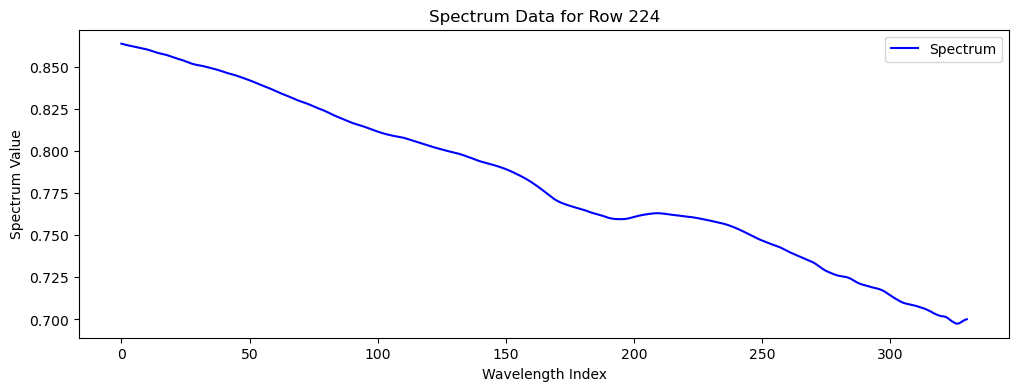

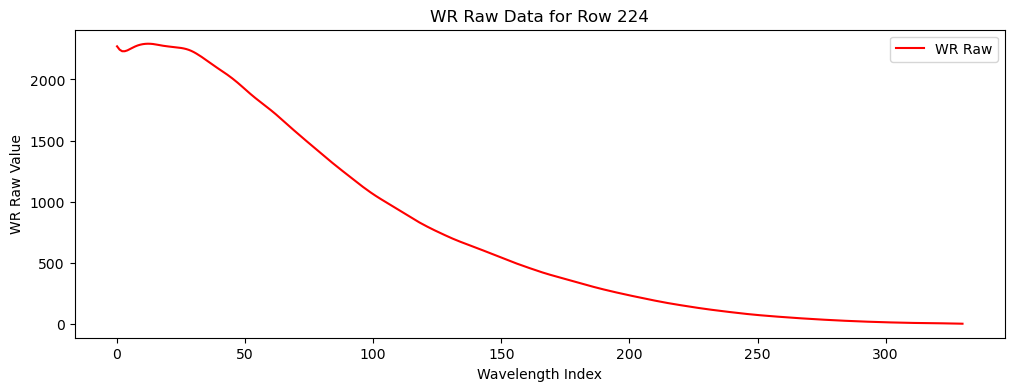

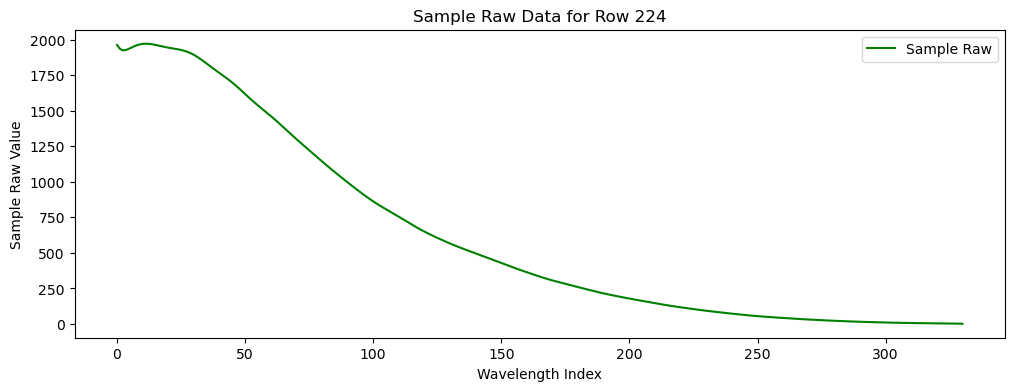

In [11]:
import random

# Randomly select a row index
random_row = random.randint(0, len(df) - 1)

# Extract values for the selected row
spectrum_values = df.loc[random_row, spectrum_cols].values
wr_raw_values = df.loc[random_row, wr_raw_cols].values
sample_raw_values = df.loc[random_row, sample_raw_cols].values

# Plot each category separately
plt.figure(figsize=(12, 4))
plt.plot(range(len(spectrum_values)), spectrum_values, label="Spectrum", color='blue')
plt.xlabel("Wavelength Index")
plt.ylabel("Spectrum Value")
plt.title(f"Spectrum Data for Row {random_row}")
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(range(len(wr_raw_values)), wr_raw_values, label="WR Raw", color='red')
plt.xlabel("Wavelength Index")
plt.ylabel("WR Raw Value")
plt.title(f"WR Raw Data for Row {random_row}")
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(range(len(sample_raw_values)), sample_raw_values, label="Sample Raw", color='green')
plt.xlabel("Wavelength Index")
plt.ylabel("Sample Raw Value")
plt.title(f"Sample Raw Data for Row {random_row}")
plt.legend()
plt.show()


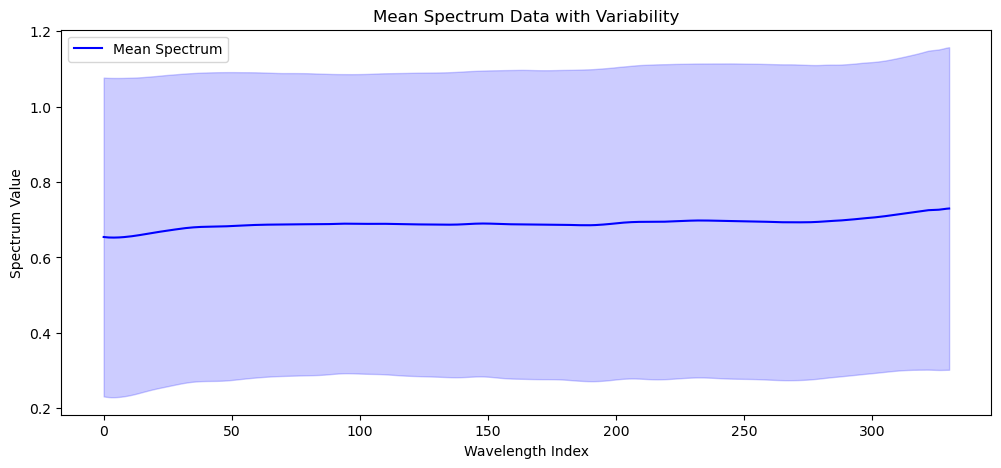

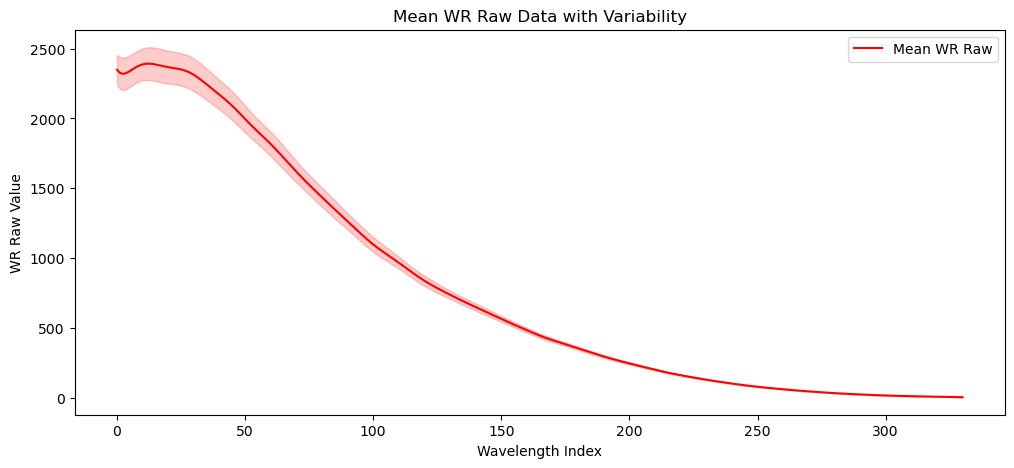

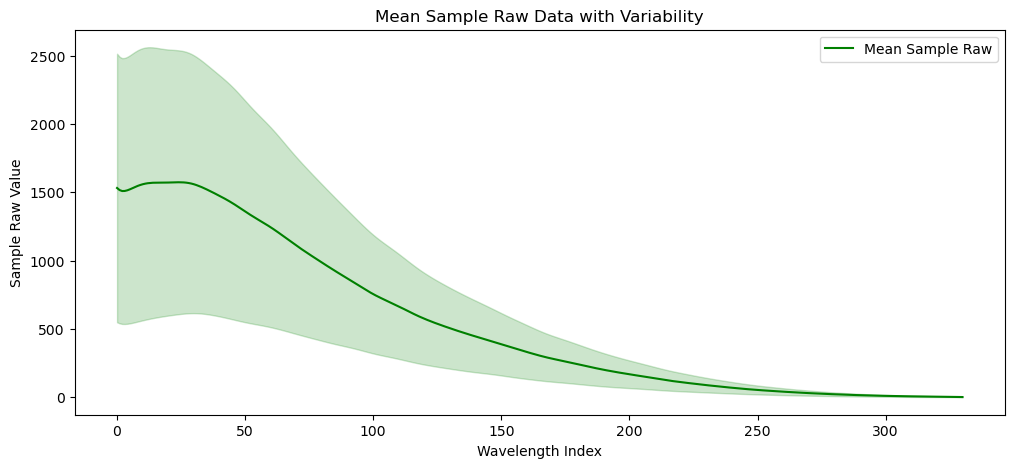

In [12]:
# Compute mean and standard deviation for each category across all samples
spectrum_mean = df[spectrum_cols].mean()
wr_raw_mean = df[wr_raw_cols].mean()
sample_raw_mean = df[sample_raw_cols].mean()

spectrum_std = df[spectrum_cols].std()
wr_raw_std = df[wr_raw_cols].std()
sample_raw_std = df[sample_raw_cols].std()

# Plot the mean trends with standard deviation as shaded regions
plt.figure(figsize=(12, 5))
plt.plot(range(len(spectrum_mean)), spectrum_mean, label="Mean Spectrum", color='blue')
plt.fill_between(range(len(spectrum_mean)), spectrum_mean - spectrum_std, spectrum_mean + spectrum_std, color='blue', alpha=0.2)
plt.xlabel("Wavelength Index")
plt.ylabel("Spectrum Value")
plt.title("Mean Spectrum Data with Variability")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(range(len(wr_raw_mean)), wr_raw_mean, label="Mean WR Raw", color='red')
plt.fill_between(range(len(wr_raw_mean)), wr_raw_mean - wr_raw_std, wr_raw_mean + wr_raw_std, color='red', alpha=0.2)
plt.xlabel("Wavelength Index")
plt.ylabel("WR Raw Value")
plt.title("Mean WR Raw Data with Variability")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(range(len(sample_raw_mean)), sample_raw_mean, label="Mean Sample Raw", color='green')
plt.fill_between(range(len(sample_raw_mean)), sample_raw_mean - sample_raw_std, sample_raw_mean + sample_raw_std, color='green', alpha=0.2)
plt.xlabel("Wavelength Index")
plt.ylabel("Sample Raw Value")
plt.title("Mean Sample Raw Data with Variability")
plt.legend()
plt.show()

# Check correlations between spectrum, WR raw, and sample raw values
correlations = pd.DataFrame({
    "Spectrum Mean": spectrum_mean,
    "WR Raw Mean": wr_raw_mean,
    "Sample Raw Mean": sample_raw_mean
}).corr()


Mean Absolute Error: nan
Mean Percentage Error: nan%


/var/folders/d1/rr9r143d5g7135gmmc4plxv00000gn/T/ipykernel_39585/1693270137.py:35: RuntimeWarning: Mean of empty slice
  mean_abs_error = np.nanmean(abs_error)
/var/folders/d1/rr9r143d5g7135gmmc4plxv00000gn/T/ipykernel_39585/1693270137.py:36: RuntimeWarning: Mean of empty slice
  mean_percent_error = np.nanmean(percent_error.values.flatten())


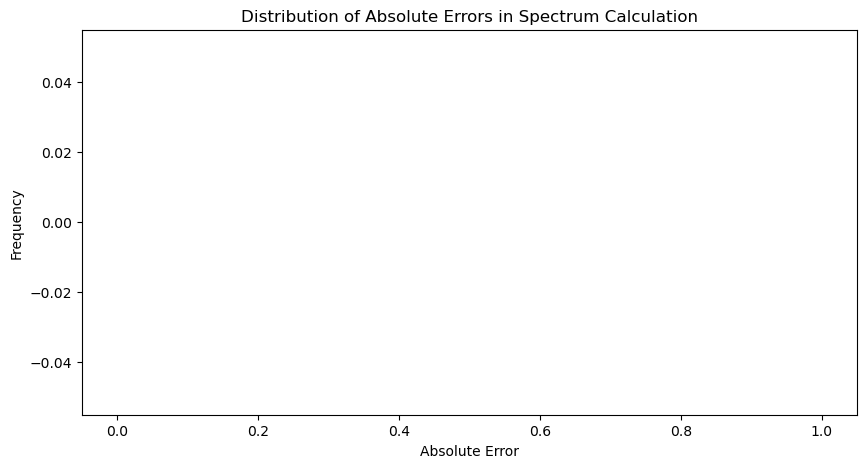

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Data Fusion Assignment 2025 Data.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

# Identify the relevant columns
spectrum_cols = [col for col in df.columns if col.startswith("spectrum_") and "+ 740" in col]
wr_raw_cols = [col for col in df.columns if col.startswith("wr_raw_") and "+ 740" in col]
sample_raw_cols = [col for col in df.columns if col.startswith("sample_raw_") and "+ 740" in col]

# Extract values
spectrum_values = df[spectrum_cols]
wr_raw_values = df[wr_raw_cols]
sample_raw_values = df[sample_raw_cols]

# Replace zeros in WR Raw to avoid division by zero
wr_raw_values = wr_raw_values.replace(0, np.nan)  # Replace 0s with NaNs first
wr_raw_values.fillna(1e-8, inplace=True)  # Replace NaNs with a small value

# Compute expected spectrum values
computed_spectrum = sample_raw_values / wr_raw_values

# Compute absolute and percentage errors
abs_error = (spectrum_values - computed_spectrum).abs()
percent_error = (abs_error / (spectrum_values + 1e-8)) * 100  # Avoid division by zero

# Drop NaN values from errors to avoid plotting issues
abs_error = abs_error.dropna().values.flatten()

# Compute error statistics
mean_abs_error = np.nanmean(abs_error)
mean_percent_error = np.nanmean(percent_error.values.flatten())

# Print summary
print(f"Mean Absolute Error: {mean_abs_error:.6f}")
print(f"Mean Percentage Error: {mean_percent_error:.6f}%")

# Plot the error distribution
plt.figure(figsize=(10, 5))
plt.hist(abs_error, bins=50, color='purple', alpha=0.7)
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")
plt.title("Distribution of Absolute Errors in Spectrum Calculation")
plt.show()


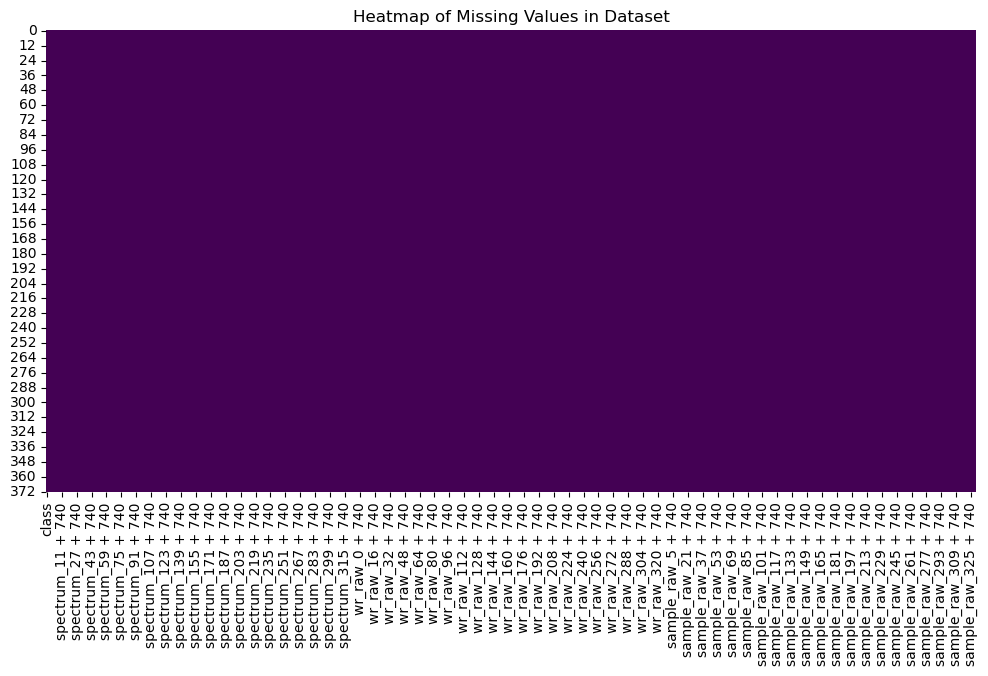

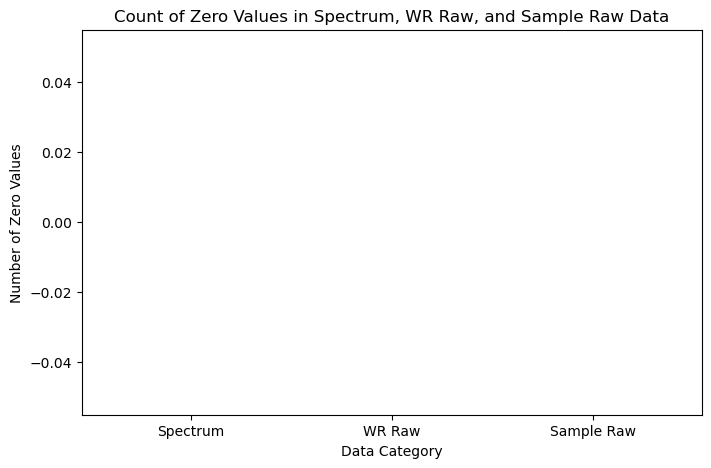

In [14]:

# Visualizing Missing Values Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values in Dataset")
plt.show()

# Count zeros in each category
spectrum_zeros = (df[spectrum_cols] == 0).sum().sum()
wr_raw_zeros = (df[wr_raw_cols] == 0).sum().sum()
sample_raw_zeros = (df[sample_raw_cols] == 0).sum().sum()

# Bar plot of zero values in each category
plt.figure(figsize=(8, 5))
plt.bar(["Spectrum", "WR Raw", "Sample Raw"], [spectrum_zeros, wr_raw_zeros, sample_raw_zeros], color=["blue", "red", "green"])
plt.xlabel("Data Category")
plt.ylabel("Number of Zero Values")
plt.title("Count of Zero Values in Spectrum, WR Raw, and Sample Raw Data")
plt.show()

# Display missing values summary
missing_values_summary = pd.DataFrame(df.isnull().sum(), columns=["Missing Count"])


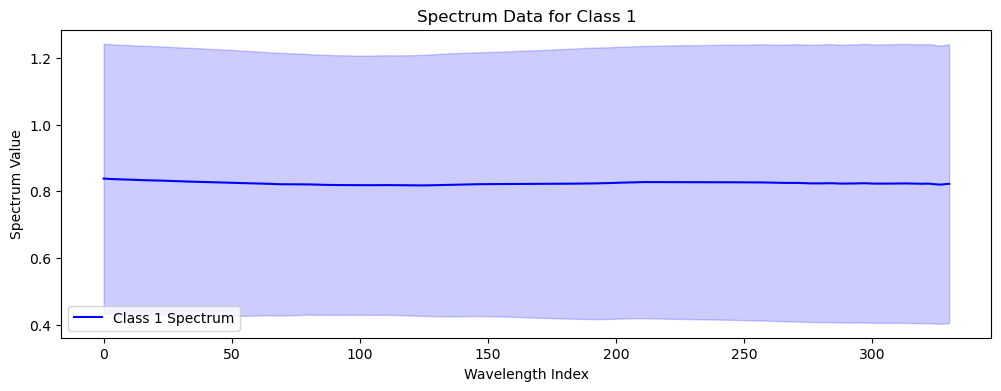

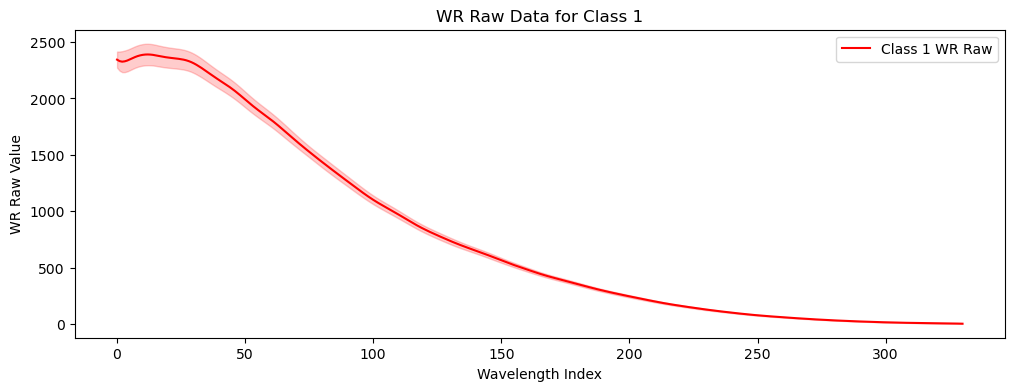

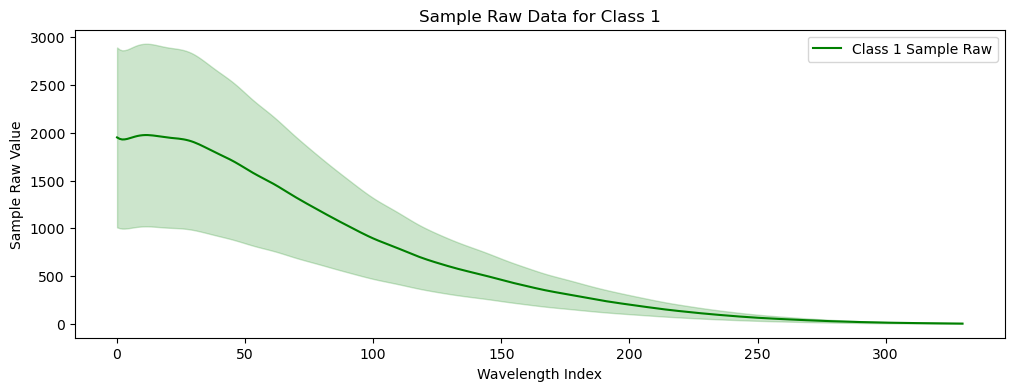

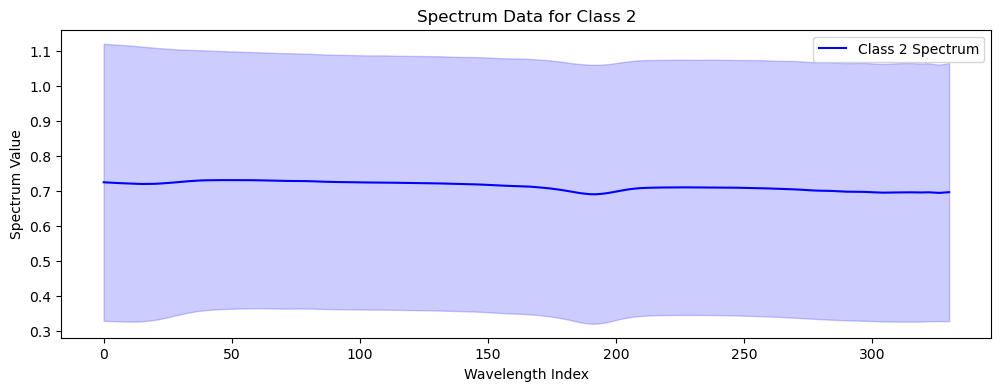

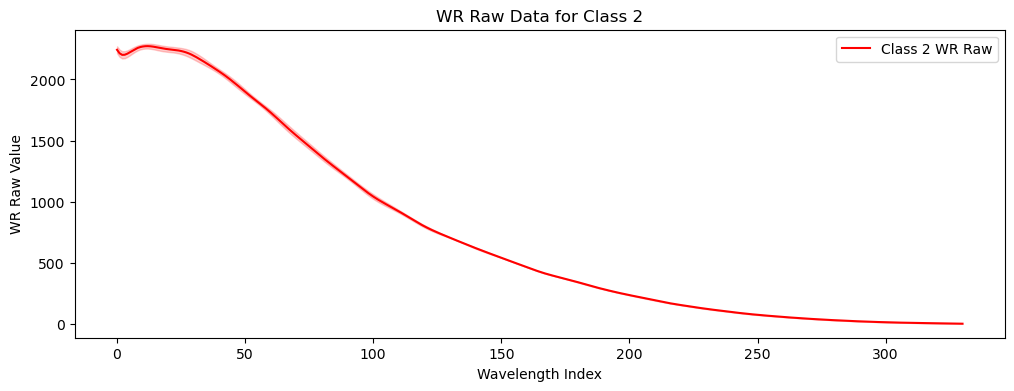

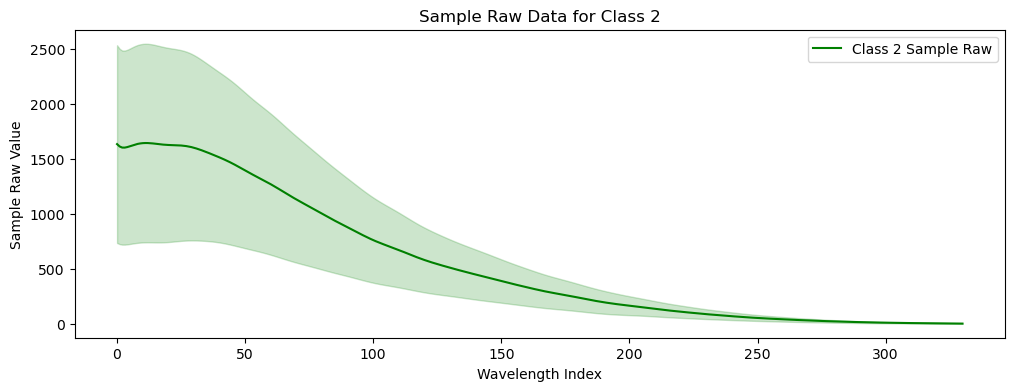

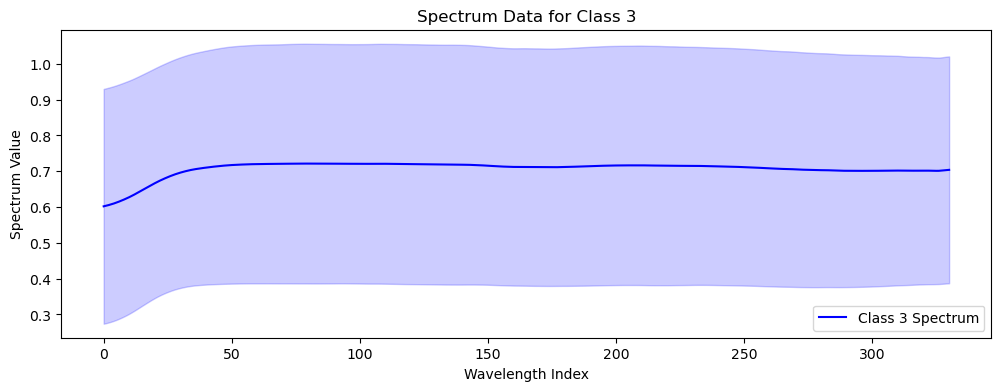

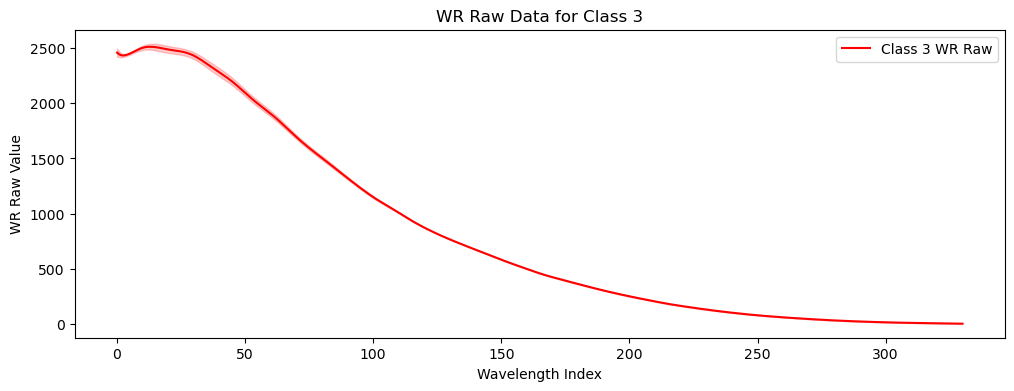

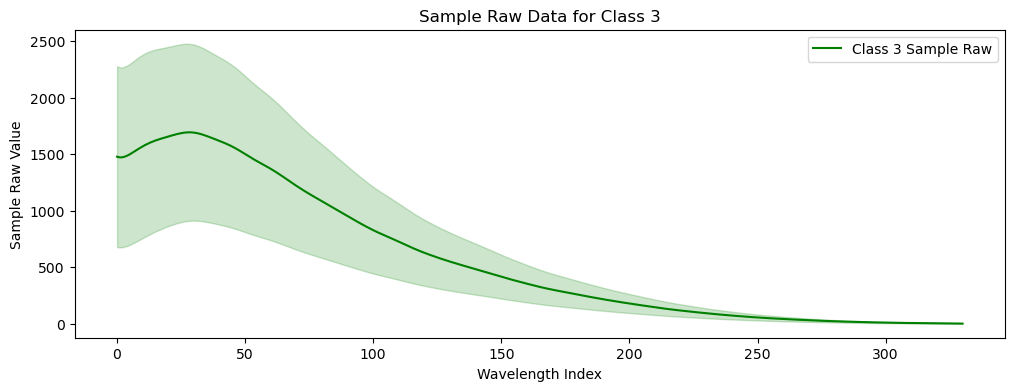

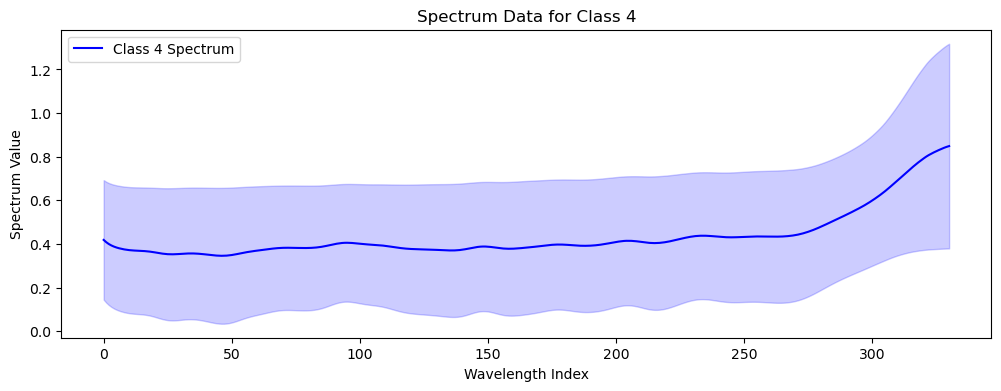

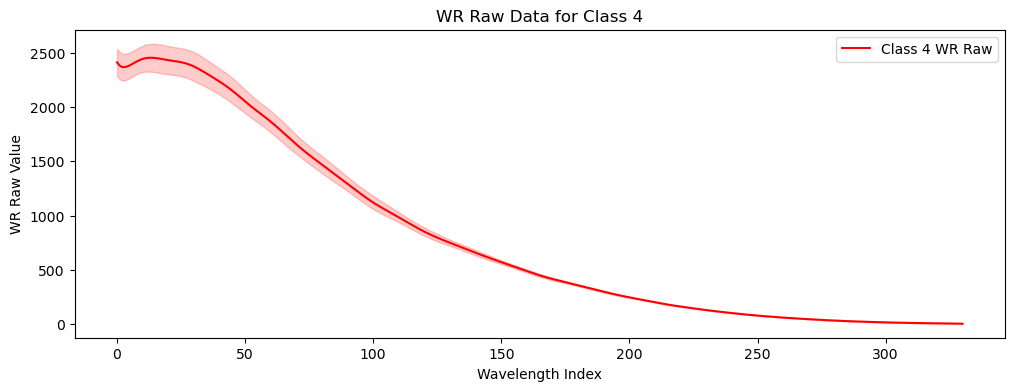

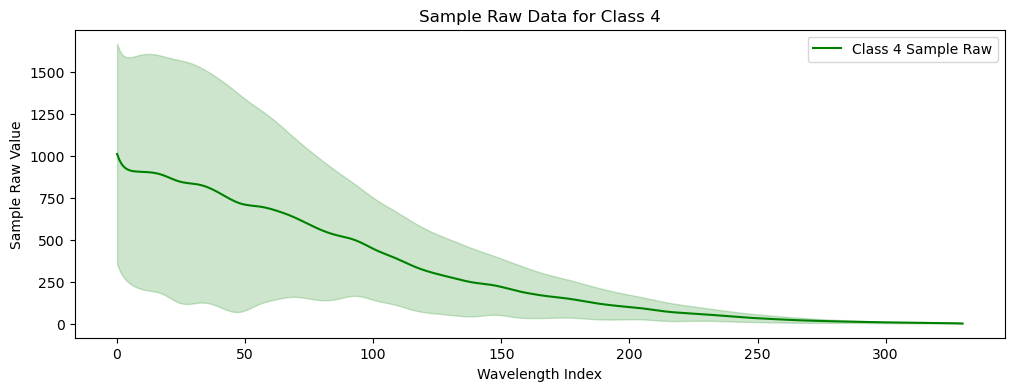

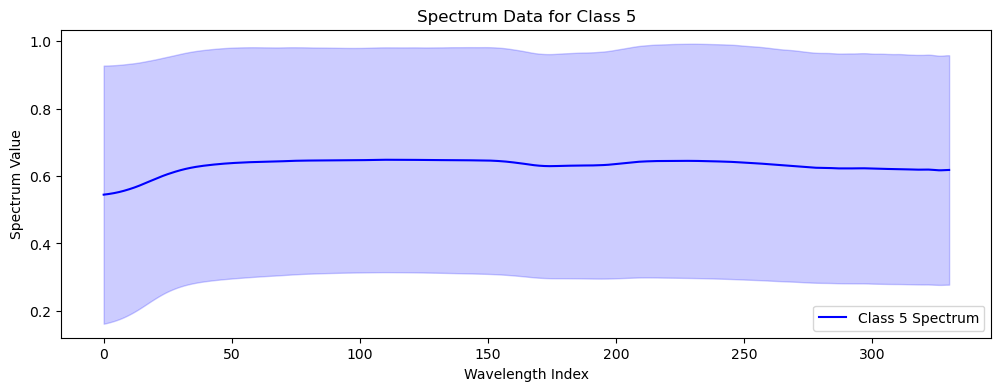

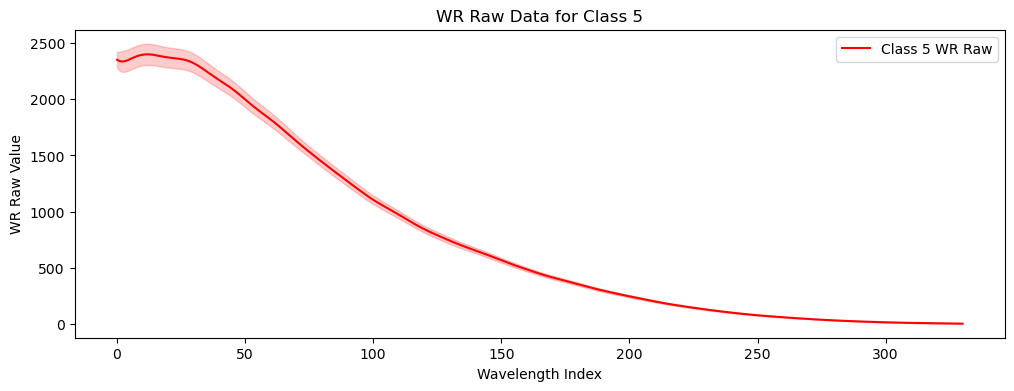

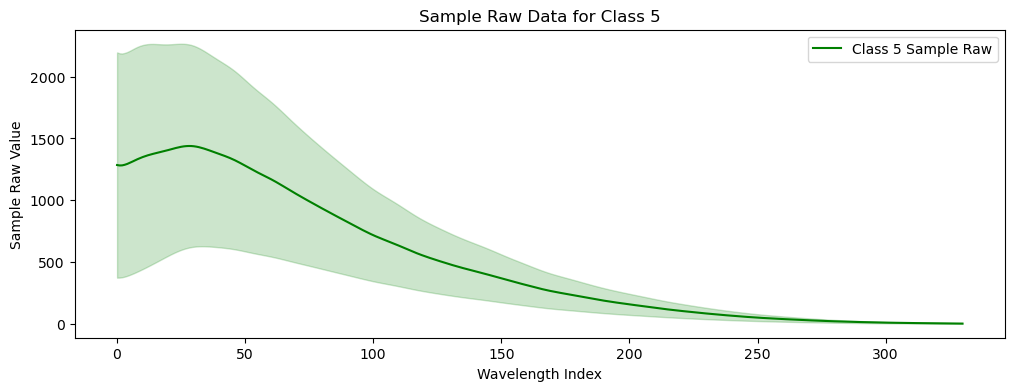

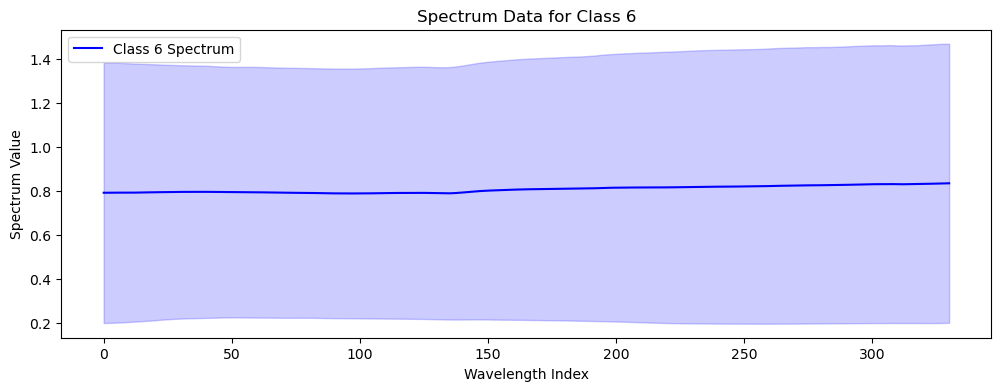

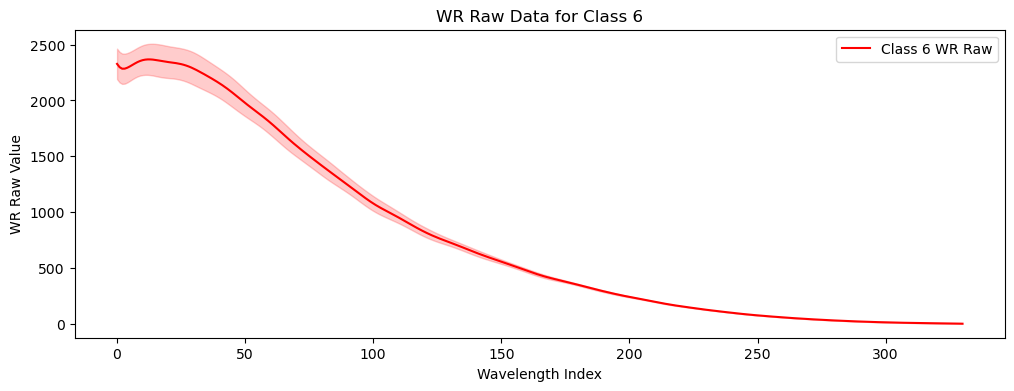

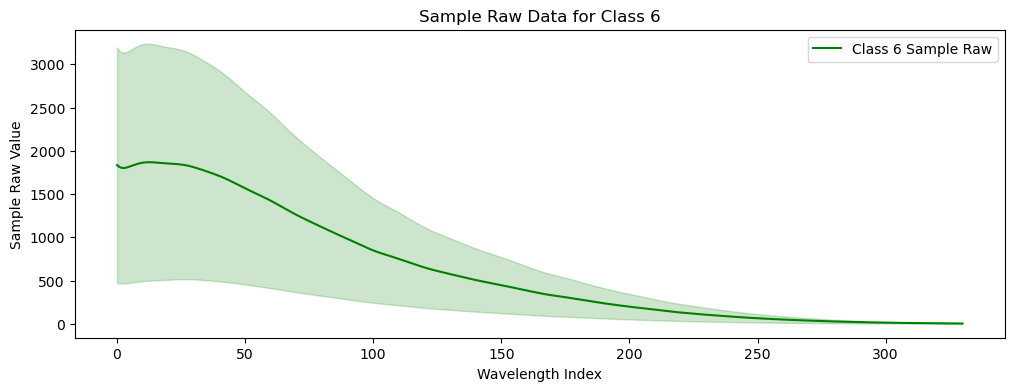

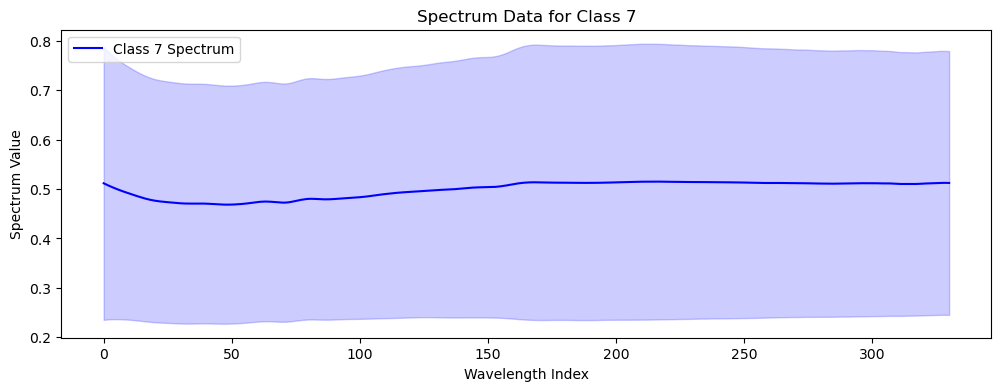

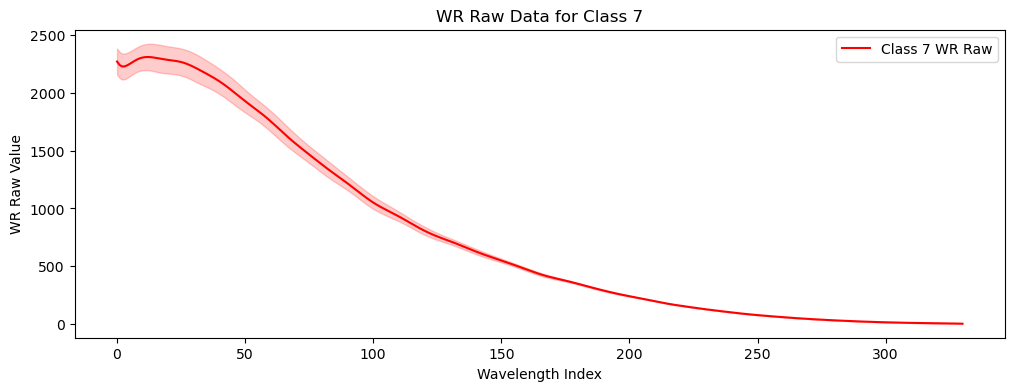

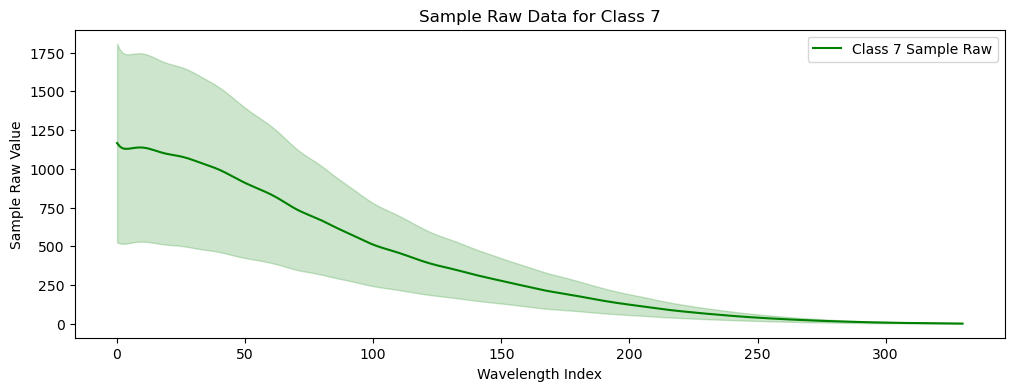

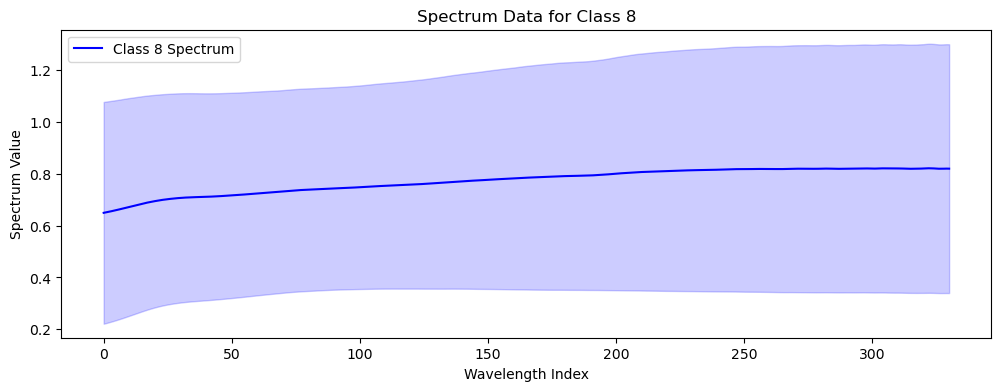

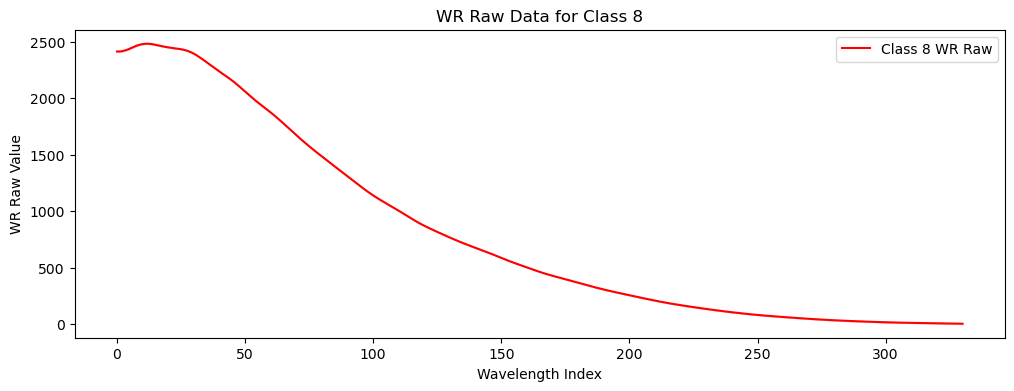

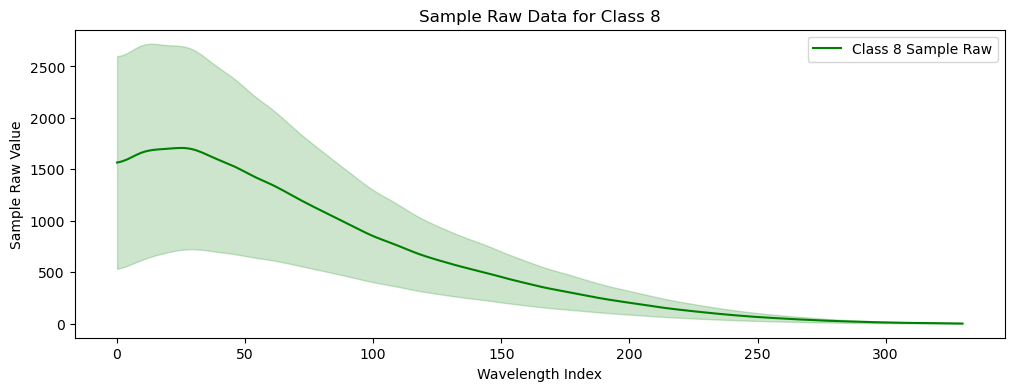

In [15]:

# Get unique class labels
classes = sorted(df["class"].unique())

# Plot each feature type for each class
for class_label in classes:
    class_df = df[df["class"] == class_label]

    # Compute mean and standard deviation for each type
    spectrum_mean = class_df[spectrum_cols].mean()
    spectrum_std = class_df[spectrum_cols].std()
    
    wr_raw_mean = class_df[wr_raw_cols].mean()
    wr_raw_std = class_df[wr_raw_cols].std()

    sample_raw_mean = class_df[sample_raw_cols].mean()
    sample_raw_std = class_df[sample_raw_cols].std()

    # Plot Spectrum
    plt.figure(figsize=(12, 4))
    plt.plot(range(len(spectrum_mean)), spectrum_mean, label=f"Class {class_label} Spectrum", color='blue')
    plt.fill_between(range(len(spectrum_mean)), spectrum_mean - spectrum_std, spectrum_mean + spectrum_std, color='blue', alpha=0.2)
    plt.xlabel("Wavelength Index")
    plt.ylabel("Spectrum Value")
    plt.title(f"Spectrum Data for Class {class_label}")
    plt.legend()
    plt.show()

    # Plot WR Raw
    plt.figure(figsize=(12, 4))
    plt.plot(range(len(wr_raw_mean)), wr_raw_mean, label=f"Class {class_label} WR Raw", color='red')
    plt.fill_between(range(len(wr_raw_mean)), wr_raw_mean - wr_raw_std, wr_raw_mean + wr_raw_std, color='red', alpha=0.2)
    plt.xlabel("Wavelength Index")
    plt.ylabel("WR Raw Value")
    plt.title(f"WR Raw Data for Class {class_label}")
    plt.legend()
    plt.show()

    # Plot Sample Raw
    plt.figure(figsize=(12, 4))
    plt.plot(range(len(sample_raw_mean)), sample_raw_mean, label=f"Class {class_label} Sample Raw", color='green')
    plt.fill_between(range(len(sample_raw_mean)), sample_raw_mean - sample_raw_std, sample_raw_mean + sample_raw_std, color='green', alpha=0.2)
    plt.xlabel("Wavelength Index")
    plt.ylabel("Sample Raw Value")
    plt.title(f"Sample Raw Data for Class {class_label}")
    plt.legend()
    plt.show()


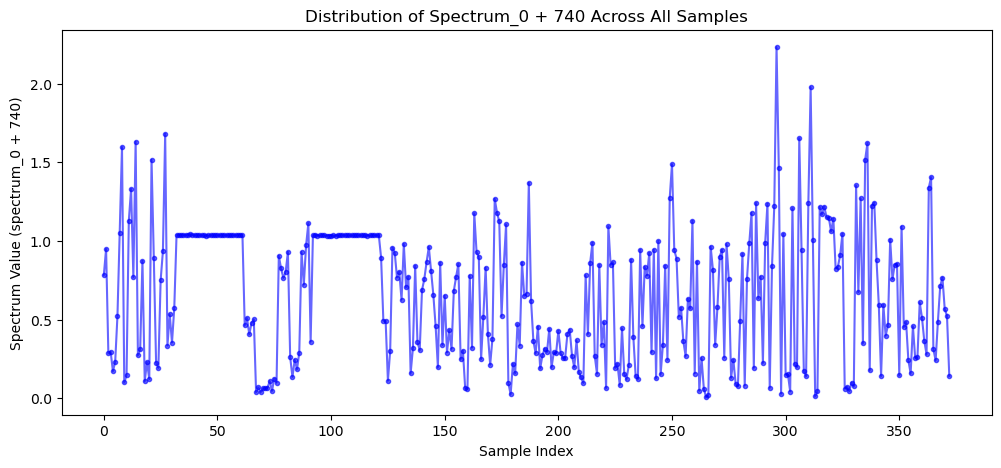

In [16]:
# Extract the first spectrum column
spectrum_first_col = "spectrum_0 + 740"

# Plot all sample values for the first spectrum column
plt.figure(figsize=(12, 5))
plt.plot(df[spectrum_first_col], marker='o', linestyle='-', markersize=3, color='blue', alpha=0.6)
plt.xlabel("Sample Index")
plt.ylabel("Spectrum Value (spectrum_0 + 740)")
plt.title("Distribution of Spectrum_0 + 740 Across All Samples")
plt.show()

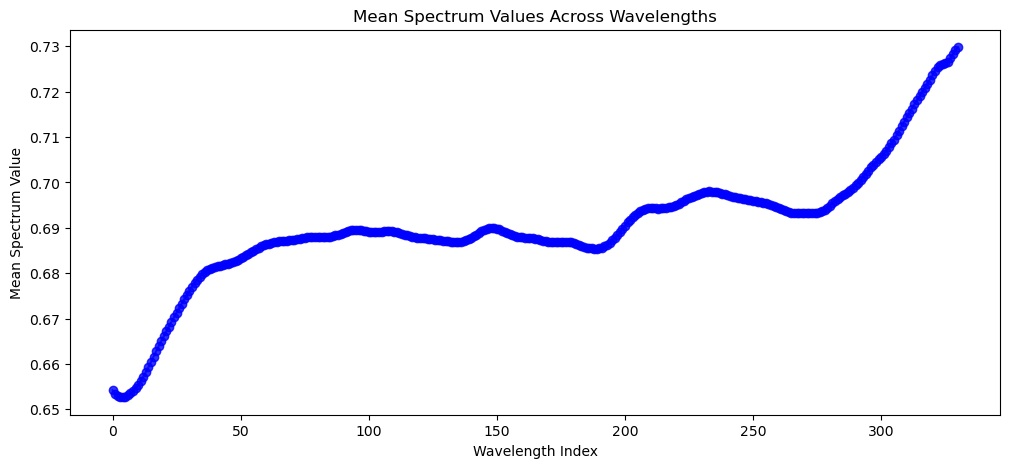

In [17]:
# Compute the mean values across all samples for each spectrum column
spectrum_mean_values = df[spectrum_cols].mean()

# Plot the mean spectrum values across wavelengths
plt.figure(figsize=(12, 5))
plt.plot(range(len(spectrum_mean_values)), spectrum_mean_values, marker='o', linestyle='-', color='blue', alpha=0.8)
plt.xlabel("Wavelength Index")
plt.ylabel("Mean Spectrum Value")
plt.title("Mean Spectrum Values Across Wavelengths")
plt.show()

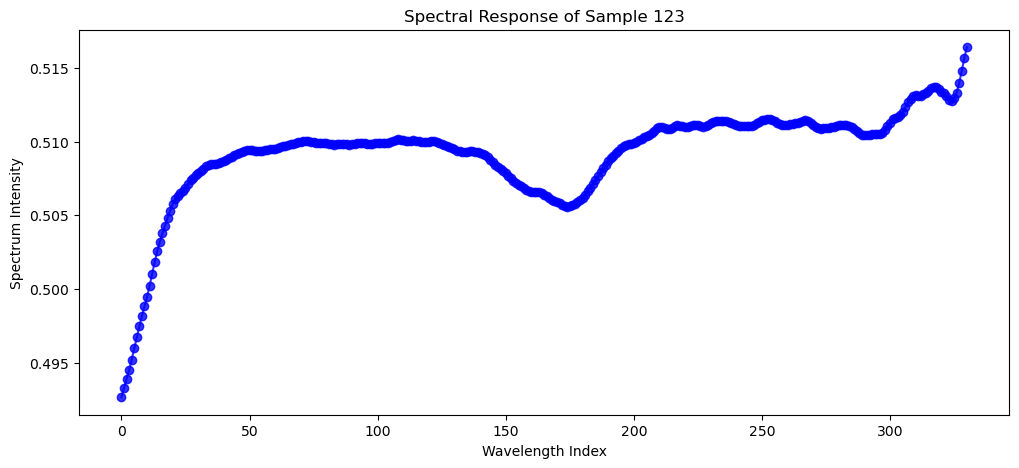

In [18]:


# Select a random sample (or a specific one)
sample_index = 123  # Change index if needed
spectrum_values = df.loc[sample_index, spectrum_cols]

# Plot spectral response for that sample
plt.figure(figsize=(12, 5))
plt.plot(range(len(spectrum_values)), spectrum_values, marker='o', linestyle='-', color='blue', alpha=0.8)
plt.xlabel("Wavelength Index")
plt.ylabel("Spectrum Intensity")
plt.title(f"Spectral Response of Sample {sample_index}")
plt.show()


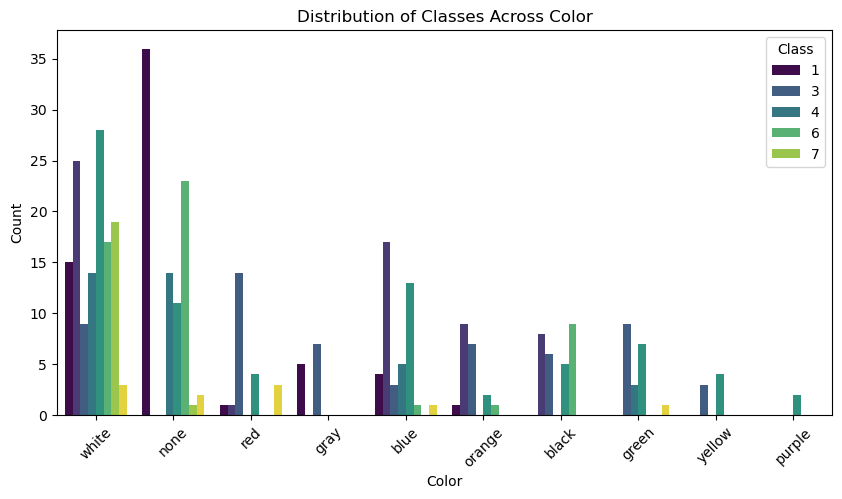

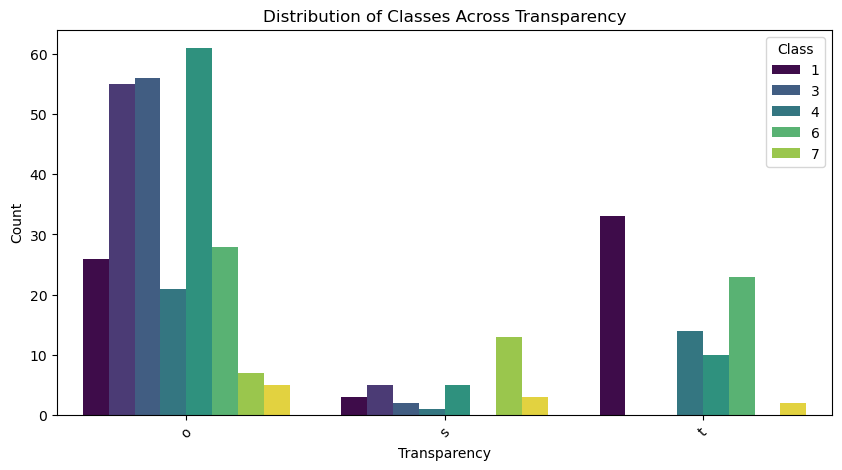

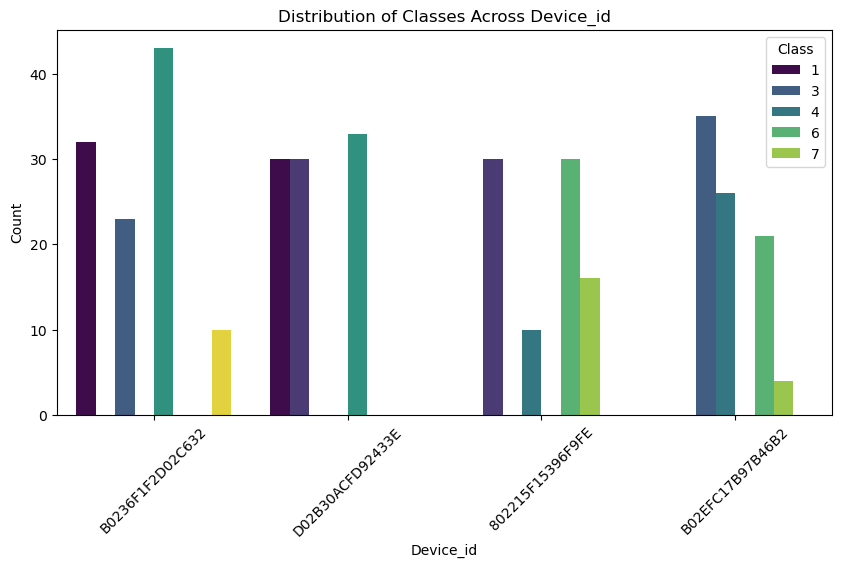

In [19]:
categorical_cols = ["color", "transparency", "device_id", "class"]

# Plot distribution of classes for each categorical variable
for col in categorical_cols[:-1]:  # Exclude 'class' itself from looping
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue="class", palette="viridis")
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")
    plt.title(f"Distribution of Classes Across {col.capitalize()}")
    plt.xticks(rotation=45)
    plt.legend(title="Class")
    plt.show()
